In [184]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [185]:
df=pd.read_csv("twitter_validation.csv",header=None,encoding='ISO-8859-1')
df    

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [186]:
df.columns=['id','media','target','text']
df

,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [187]:
df.head()

,id,media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [188]:
df.tail()

,id,media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [189]:
df.shape

(1000, 4)

In [190]:
df.dtypes

id         int64
media     object
target    object
text      object
dtype: object

In [191]:
#counting unique values of target
df['target'].unique()

array(['Irrelevant', 'Neutral', 'Negative', 'Positive'], dtype=object)

In [192]:
df1=df['target'].value_counts()
df1

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

<BarContainer object of 4 artists>

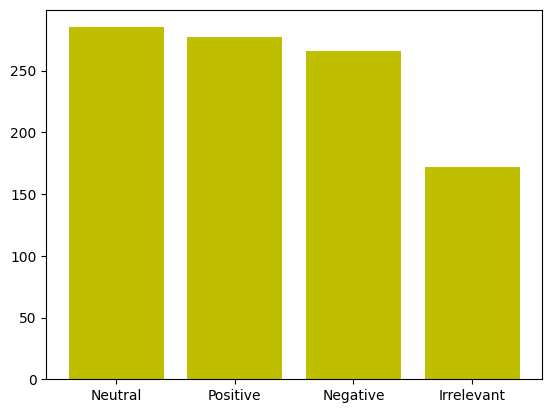

In [193]:
plt.bar(df1.index,df1.values,color='y')

<Axes: xlabel='target', ylabel='count'>

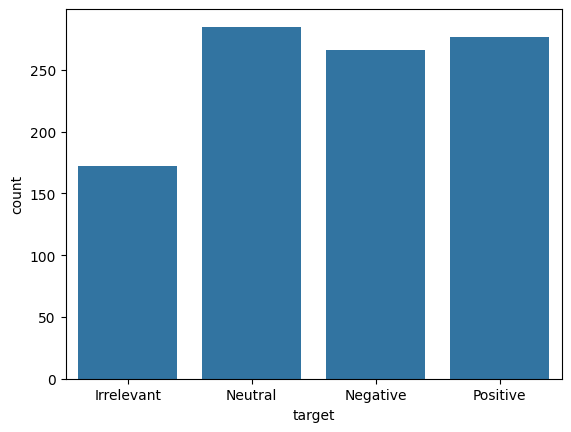

In [194]:
sns.countplot(x=df['target'],data=df)

In [195]:
df['media'].unique()

array(['Facebook', 'Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA',
       'MaddenNFL', 'TomClancysRainbowSix', 'AssassinsCreed',
       'CallOfDuty', 'Dota2', 'Verizon', 'NBA2K', 'Nvidia',
       'GrandTheftAuto(GTA)', 'RedDeadRedemption(RDR)', 'Hearthstone',
       'ApexLegends', 'Overwatch', 'PlayerUnknownsBattlegrounds(PUBG)',
       'Borderlands', 'PlayStation5(PS5)', 'johnson&johnson', 'Fortnite',
       'Xbox(Xseries)', 'CallOfDutyBlackopsColdWar', 'HomeDepot',
       'Cyberpunk2077', 'TomClancysGhostRecon', 'WorldOfCraft',
       'LeagueOfLegends', 'Battlefield'], dtype=object)

In [196]:
df['media'].value_counts()

media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                             

In [197]:
#removing rows with target irrelevant
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df

,id,media,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [198]:
#index arranging
df.reset_index(drop=True,inplace=True)  
df


,id,media,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [199]:
#removing id and media columns
df.drop(['id','media'],axis=1,inplace=True) 
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [200]:
df.dtypes

target    object
text      object
dtype: object

In [201]:
#converting target column to numerical
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [202]:
df.dtypes

target     int64
text      object
dtype: object

In [203]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [204]:
#importing necessary libraries for text preprocessing
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [205]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [206]:
#tokenization
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x)) #remove coma and words seperated by space
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [207]:
#remove special characters
tweets=tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [208]:
#collect words with more than 2 characters(meaningful words)rest are to,at etc etc
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>2]))
tweets



0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [209]:
#stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')  
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [210]:
#removing stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets    


0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [211]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)
train_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10351 stored elements and shape (828, 3695)>

In [212]:
train_data.shape

(828, 3695)

In [213]:
print(train_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10351 stored elements and shape (828, 3695)>
  Coords	Values
  (0, 417)	0.49031253984627876
  (0, 2186)	0.394104073145298
  (0, 254)	0.15115412177221707
  (0, 513)	0.22624362709845244
  (0, 1725)	0.24515626992313938
  (0, 447)	0.2601680790626036
  (0, 2668)	0.2601680790626036
  (0, 688)	0.2137861877383711
  (0, 742)	0.17311152137137992
  (0, 186)	0.22624362709845244
  (0, 1888)	0.13243685500438873
  (0, 1016)	0.23450522183507658
  (0, 888)	0.2601680790626036
  (0, 571)	0.2601680790626036
  (1, 2048)	0.24555654927912696
  (1, 3550)	0.26216072802580975
  (1, 2363)	0.3126902562590763
  (1, 3590)	0.36557591217188057
  (1, 1293)	0.4055823664694651
  (1, 2461)	0.3821800909185634
  (1, 2801)	0.4055823664694651
  (1, 678)	0.4055823664694651
  (2, 839)	0.3041178383627944
  (2, 1998)	0.3963165794888645
  (2, 1290)	0.3790982275064499
  :	:
  (825, 510)	0.2298106111210094
  (825, 3294)	0.2560582225152133
  (825, 3304)	0.3395996844494918

In [214]:
#assigning output to y variable
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [215]:
#ml model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=1)  
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7197 stored elements and shape (579, 3695)>

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
knn=KNeighborsClassifier(n_neighbors=7)
base=MultinomialNB()
sv=SVC()
dec=DecisionTreeClassifier(criterion='entropy')
from sklearn.metrics import accuracy_score


In [217]:
lst=[sv,dec,knn,base]
for i in lst:
    print('model name is:',i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(y_pred)
    print("*"*100)
    print('accuracy is:',accuracy_score(y_test,y_pred))

model name is: SVC()
[ 0 -1  0 -1 -1 -1  0  0  1  1  0  0  0  0  1  0  0 -1 -1  0  1  0  1  1
 -1  0  0  1 -1  0  1  0  0 -1 -1  0 -1 -1 -1  1  0 -1  1 -1 -1  1  1  0
 -1  0  0  0 -1 -1  0 -1  1  0 -1  0 -1  0  0 -1 -1  1 -1  1 -1  0  1  1
  0 -1  0 -1  1 -1 -1  1  0  0 -1 -1  1  0  0 -1 -1  0  0  0  1 -1  0  1
  1  1  1  1 -1 -1 -1 -1  0  1 -1  0  1  0 -1  1 -1  0 -1 -1  0  0 -1  0
 -1  1  1  1  1 -1  0  0  0  0 -1 -1 -1  1  0 -1  1 -1 -1  0 -1  1  0  1
  0  0  1 -1  0  1  0 -1  0 -1  1  1  0 -1  1 -1  0  1 -1 -1 -1  1  1  1
  0 -1  0 -1  0 -1  0  1  1  0 -1 -1 -1  0  0  0  1  1 -1 -1 -1 -1  0  0
  1  0 -1  0 -1  0  1  0 -1 -1  0  0  1  1 -1  0  0  0 -1 -1 -1  0  0 -1
 -1  0  1  0 -1  0  0  1  1  1  1  0  0  0 -1  0  0 -1 -1  1  0  1  1  0
 -1 -1  0  1  1  1 -1 -1  0]
****************************************************************************************************
accuracy is: 0.6104417670682731
model name is: DecisionTreeClassifier(criterion='entropy')
[ 0 -1  0  1  1  1  1  0  1 

In [218]:
#svc
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 0, -1,  0, -1, -1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
       -1, -1,  0,  1,  0,  1,  1, -1,  0,  0,  1, -1,  0,  1,  0,  0, -1,
       -1,  0, -1, -1, -1,  1,  0, -1,  1, -1, -1,  1,  1,  0, -1,  0,  0,
        0, -1, -1,  0, -1,  1,  0, -1,  0, -1,  0,  0, -1, -1,  1, -1,  1,
       -1,  0,  1,  1,  0, -1,  0, -1,  1, -1, -1,  1,  0,  0, -1, -1,  1,
        0,  0, -1, -1,  0,  0,  0,  1, -1,  0,  1,  1,  1,  1,  1, -1, -1,
       -1, -1,  0,  1, -1,  0,  1,  0, -1,  1, -1,  0, -1, -1,  0,  0, -1,
        0, -1,  1,  1,  1,  1, -1,  0,  0,  0,  0, -1, -1, -1,  1,  0, -1,
        1, -1, -1,  0, -1,  1,  0,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,
       -1,  1,  1,  0, -1,  1, -1,  0,  1, -1, -1, -1,  1,  1,  1,  0, -1,
        0, -1,  0, -1,  0,  1,  1,  0, -1, -1, -1,  0,  0,  0,  1,  1, -1,
       -1, -1, -1,  0,  0,  1,  0, -1,  0, -1,  0,  1,  0, -1, -1,  0,  0,
        1,  1, -1,  0,  0,  0, -1, -1, -1,  0,  0, -1, -1,  0,  1,  0, -1,
        0,  0,  1,  1,  1

In [219]:
print('accuracy is:',accuracy_score(y_test,y_pred))

accuracy is: 0.6104417670682731


In [227]:
#predict an outside sample
sample=["sooo horrible"]
sample=vec.transform(sample)
sample_pred=model.predict(sample)
sample_pred
reverse_map = {1: "Positive", -1: "Negative", 0: "Neutral"}

print("Final Label:", reverse_map[sample_pred[0]])

Final Label: Negative
